In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


from api_keys import api_key
temp_units = "imperial"


from citipy import citipy

output_data_file = "weather_df.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

count_one = 0
set_one = 1

In [2]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

len(cities)

627

In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


count_one = 0
set_one = 1


for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 49:
            count_one = 0
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | nyurba
Processing Record 2 of Set 1 | caala
Processing Record 3 of Set 1 | hobyo
Processing Record 4 of Set 1 | port elizabeth
City not found. Skipping...
Processing Record 5 of Set 1 | khatanga
Processing Record 6 of Set 1 | san policarpo
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | sao luiz gonzaga
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | oranjestad
Processing Record 13 of Set 1 | verkhoyansk
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | cannington
Processing Record 18 of Set 1 | samarai
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | ialibu
Processing Record 22 of Set 1 | elk plain
Processing Record 23 of Set 1 | sturgis
Processing Record 24 of Set

Processing Record 32 of Set 4 | saldanha
Processing Record 33 of Set 4 | mecca
Processing Record 34 of Set 4 | duluth
City not found. Skipping...
Processing Record 35 of Set 4 | bambous virieux
Processing Record 36 of Set 4 | korgen
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | vila franca do campo
Processing Record 39 of Set 4 | bozeman
City not found. Skipping...
Processing Record 40 of Set 4 | san juan
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | kavieng
City not found. Skipping...
Processing Record 43 of Set 4 | urusha
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | cheyenne
Processing Record 46 of Set 4 | navahrudak
Processing Record 47 of Set 4 | san-pedro
Processing Record 48 of Set 4 | kungurtug
Processing Record 49 of Set 4 | bandarbeyla
Processing Record 50 of Set 4 | namibe
Processing Record 0 of Set 5 | saint-pierre
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | ma

Processing Record 10 of Set 8 | ozinki
City not found. Skipping...
Processing Record 11 of Set 8 | luganville
Processing Record 12 of Set 8 | wukari
Processing Record 13 of Set 8 | tuatapere
Processing Record 14 of Set 8 | dhadar
Processing Record 15 of Set 8 | zhangye
Processing Record 16 of Set 8 | sola
Processing Record 17 of Set 8 | roald
Processing Record 18 of Set 8 | east london
Processing Record 19 of Set 8 | longyearbyen
Processing Record 20 of Set 8 | nantucket
Processing Record 21 of Set 8 | goderich
Processing Record 22 of Set 8 | palmetto
Processing Record 23 of Set 8 | diamantino
Processing Record 24 of Set 8 | shitanjing
Processing Record 25 of Set 8 | osoyoos
Processing Record 26 of Set 8 | healdsburg
Processing Record 27 of Set 8 | poum
Processing Record 28 of Set 8 | acapulco
Processing Record 29 of Set 8 | saint-malo
Processing Record 30 of Set 8 | cherskiy
Processing Record 31 of Set 8 | impfondo
Processing Record 32 of Set 8 | port macquarie
City not found. Skippin

Processing Record 41 of Set 11 | mackay
Processing Record 42 of Set 11 | fastiv
Processing Record 43 of Set 11 | anshun
City not found. Skipping...
Processing Record 44 of Set 11 | yinchuan
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nyurba,100,RU,1570831275,88,63.29,118.35,18.30,9.43
1,caala,100,AO,1570831337,89,-12.85,15.56,62.91,1.38
2,hobyo,20,SO,1570831217,79,5.35,48.53,80.35,11.40
3,port elizabeth,69,CD,1570831192,66,-7.04,29.76,78.46,4.62
4,khatanga,100,RU,1570831201,61,71.98,102.47,23.27,8.77


In [6]:
weather_dataframe.to_csv(output_data_file)

In [7]:
weather_dataframe.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [8]:
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nyurba,100,RU,1570831275,88,63.29,118.35,18.30,9.43
1,caala,100,AO,1570831337,89,-12.85,15.56,62.91,1.38
2,hobyo,20,SO,1570831217,79,5.35,48.53,80.35,11.40
3,port elizabeth,69,CD,1570831192,66,-7.04,29.76,78.46,4.62
4,khatanga,100,RU,1570831201,61,71.98,102.47,23.27,8.77


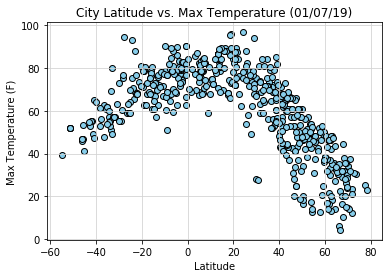

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig1.png")
plt.show()

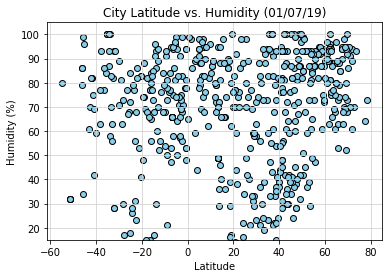

In [11]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig2.png")
plt.show()

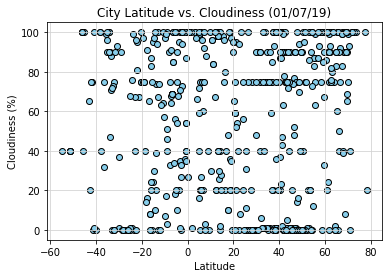

In [12]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig3.png")
plt.show()

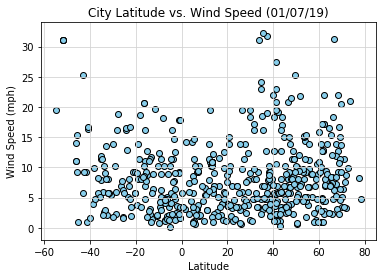

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("fig4.png")
plt.show()

Analysis
-It seems that there is a clear correlation between Temperature and Latitude.

-A majority of the Wind Speeds for these cities are below 20 mph regardless of Latitude.

-The scatter plot showing the relationship between Cloudiness and Latitude has the least correlation of the four scatter plots.